In [11]:
import numpy as np
import graph_tool.all as gt
from rich import print
import random
from tqdm import trange
import matplotlib.pyplot as plt
import pandas as pd
from simulation_with_time_window import simulate_SIS, make_node_feature_df

Hello from cn-final-project!

100%|██████████| 501/501 [03:27<00:00,  2.42it/s, Infected fraction=0.189]


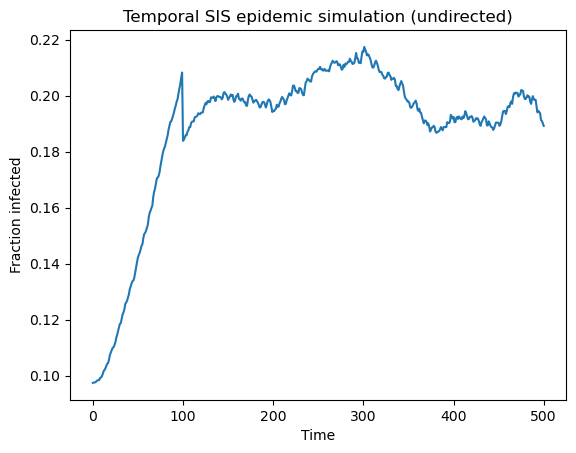

In [3]:
random.seed(42)
print("Hello from cn-final-project!")
g = gt.collection.ns["escorts"]

sim, g = simulate_SIS(g, max_steps=500, start=1000)

plt.plot(sim)
plt.xlabel("Time")
plt.ylabel("Fraction infected")
plt.title("Temporal SIS epidemic simulation (undirected)")
plt.savefig("plots/temporal_sis_simulation_with_time_window.png")
# plt.show()

In [12]:
df = make_node_feature_df(g)

Computing centrality metrics...

Computed degree

Computed closeness

In [ ]:
def leverage_centrality(g: gt.Graph):
    """
    Unweighted leverage centrality for all vertices. Assumes g is undirected.
    """
    deg_pm = g.degree_property_map("total")
    deg_arr = deg_pm.a

    L = g.new_vertex_property("double")

    for v in g.vertices():
        i = int(v)
        ki = deg_arr[i]
        if ki == 0:
            L[v] = 0.0
            continue
        s = 0.0
        for u in v.out_neighbors():
            kj = deg_arr[int(u)]
            denom = ki + kj
            if denom != 0:
                s += (ki - kj) / denom
        L[v] = s / ki

    return L

L = leverage_centrality(g)
L_arr = L.a            # PropertyArray, same order as deg_arr
deg = g.degree_property_map("total")
deg_arr = deg.a

[ 0.70955869 -0.24482105  0.40744813 ...  0.          0.
  0.        ]

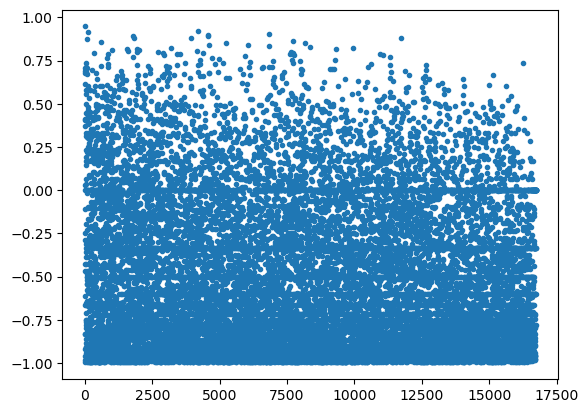

In [9]:
plt.plot(L_arr, '.')

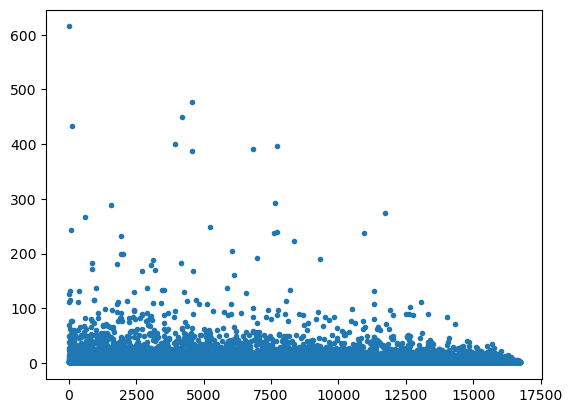

In [10]:
plt.plot(deg_arr, '.')

In [ ]:
def leverage_centrality(g, weight=None):
    """
    Compute node leverage (a.k.a. leverage centrality) for all vertices.

    Parameters
    ----------
    g : graph_tool.Graph
        The graph (directed or undirected).
    weight : graph_tool.EdgePropertyMap (optional)
        If provided, computes a weighted variant using node strength
        and weighting each neighbor contribution by the edge weight.

    Returns
    -------
    L : graph_tool.VertexPropertyMap (double)
        Leverage score for each vertex.
    """
    # use out-degree for both directed/undirected; for undirected it's fine
    deg = g.degree_property_map("total").a
    # for v in g.vertices():
    #     deg[v] = v.out_degree()

    # if weight is not None:
    #     # precompute node strengths (sum of incident weights)
    #     strength = g.new_vertex_property("double")
    #     for v in g.vertices():
    #         s = 0.0
    #         for e in v.out_edges():
    #             s += weight[e]
    #         strength[v] = s

    L = g.new_vertex_property("double")

    for v in g.vertices():
        ki = deg[v]
        if ki == 0:
            L[v] = 0.0
            continue

        accum = 0.0
        norm = ki

        if weight is None:
            for e in v.out_edges():
                u = e.target()
                kj = deg[u]
                accum += (ki - kj) / (ki + kj)
        # else:
        #     norm = strength[v]
        #     if norm == 0:
        #         L[v] = 0.0
        #         continue
        #     for e in v.out_edges():
        #         u = e.target()
        #         kj = deg[u]
        #         wij = weight[e]
        #         accum += wij * (ki - kj) / (ki + kj)

        L[v] = accum / norm

    return L


hello world
